In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [194]:
data = pd.read_csv("./data/raw_data.csv")
data = data.dropna()
data.rename(columns={'y': 'subscribed'}, inplace=True)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [200]:

current_year = 2008

for ind in data.index:
    if ind == 0:
        data.at[ind,'year'] = int(current_year)
        continue

    if data['month'][ind] != data['month'][ind-1]:
        if data['month'][ind-1] == 'dec':
            current_year += 1
    data.at[ind,'year'] = int(current_year)

data['year'] = data['year'].astype(int)
  

data["date"] = '01-' + pd.to_datetime(data.month, format='%b').dt.month.astype(str).str.zfill(2) +"-"+ data['year'].astype(str)
data['date'] = pd.to_datetime(data['date'], format="%d-%m-%Y")

data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01


          date  rate_of_yes
0   2008-05-01     0.030916
1   2008-06-01     0.042981
2   2008-07-01     0.060883
3   2008-08-01     0.052367
4   2008-10-01     0.626866
5   2008-11-01     0.052544
6   2008-12-01     0.100000
7   2009-03-01     0.446809
8   2009-04-01     0.179821
9   2009-05-01     0.090438
10  2009-06-01     0.369231
11  2009-07-01     0.370787
12  2009-08-01     0.342857
13  2009-09-01     0.397004
14  2009-10-01     0.402685
15  2009-11-01     0.470588
16  2009-12-01     0.511628
17  2010-03-01     0.568182
18  2010-04-01     0.557471
19  2010-05-01     0.575472
20  2010-06-01     0.467249
21  2010-07-01     0.565916
22  2010-08-01     0.515021
23  2010-09-01     0.495050
24  2010-10-01     0.455882
25  2010-11-01     0.453125


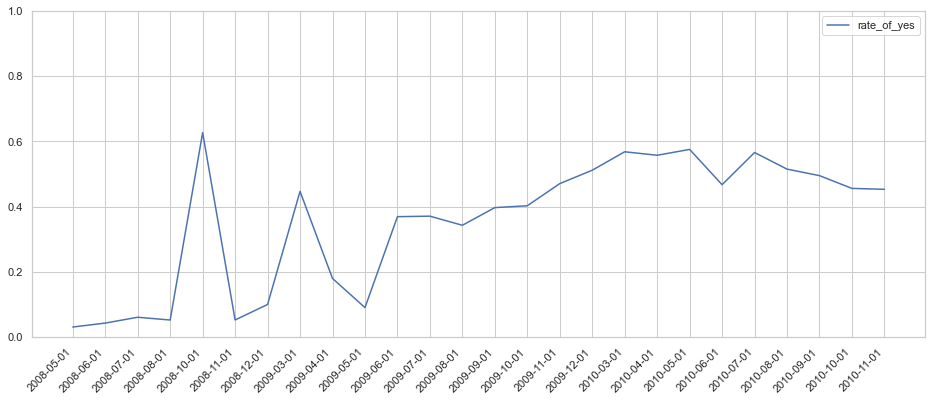

In [215]:
data.head()

# Group by 'date' column and calculate the rate of 'yes' values in 'subscribed' column
grouped = data.groupby(data['date'].dt.date)['subscribed'].apply(lambda x: (x == 'yes').mean()).reset_index()

# Rename the calculated column
grouped.rename(columns={'subscribed': 'rate_of_yes'}, inplace=True)

grouped.set_index(grouped.date)
print(grouped)


ax = grouped.plot(kind='line',figsize=[16,6],ylim=(0,1),xticks=grouped.index,stacked=True)
ax.set_xticklabels(grouped["date"]);

# plt.ylabel('Rate of "Yes"')
plt.xticks(rotation=45, ha='right')


# Displaying the plot
plt.show()

In [216]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01


In [218]:
data.info()
selected_data = data.loc[data['date'] >= '2009-04-01']
selected_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             41188 non-null  int64         
 1   job             41188 non-null  object        
 2   marital         41188 non-null  object        
 3   education       41188 non-null  object        
 4   default         41188 non-null  object        
 5   housing         41188 non-null  object        
 6   loan            41188 non-null  object        
 7   contact         41188 non-null  object        
 8   month           41188 non-null  object        
 9   day_of_week     41188 non-null  object        
 10  campaign        41188 non-null  int64         
 11  pdays           41188 non-null  int64         
 12  previous        41188 non-null  int64         
 13  poutcome        41188 non-null  object        
 14  emp.var.rate    41188 non-null  float64       
 15  co

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
27972,38,services,married,high.school,no,yes,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,2009,2009-04-01
27973,33,blue-collar,married,basic.6y,no,yes,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,yes,2009,2009-04-01
27974,43,self-employed,married,high.school,unknown,yes,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,2009,2009-04-01
27975,31,technician,married,professional.course,no,yes,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,2009,2009-04-01
27976,43,self-employed,married,high.school,unknown,no,no,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,no,2009,2009-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010,2010-11-01
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010,2010-11-01
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010,2010-11-01
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010,2010-11-01


In [ ]:
selected_data.to_csv('./data/selected_data.csv',index=False)